In [ ]:
# %pip install scipy
# %pip install matplotlib
# %pip install SpeechRecognition
# %pip install wave
# %pip install librosa
# %pip install ipython

Conversão para .WAV

In [ ]:
# import required modules
# import subprocess

# # # # convert to wav file
# subprocess.call(['ffmpeg', '-i', 'moli_assovio_2.ogg',
#                   'moli_assovio_2.wav'])

Conversão audios estereos para mono

Text(0, 0.5, 'Amplitute')

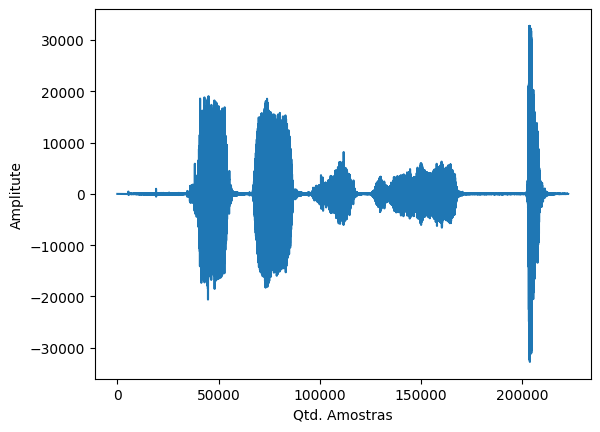

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wav

rate, data = wav.read('assovio.wav')

# somando os dois canais e normalizando (passando de estereo para mono)
# data = np.sum(data, axis=1) / 2 
plt.plot(data)
plt.xlabel('Qtd. Amostras')
plt.ylabel('Amplitute')

Converter qtd. amostra para tempo (Eixo X)

Text(0, 0.5, 'Amplitute')

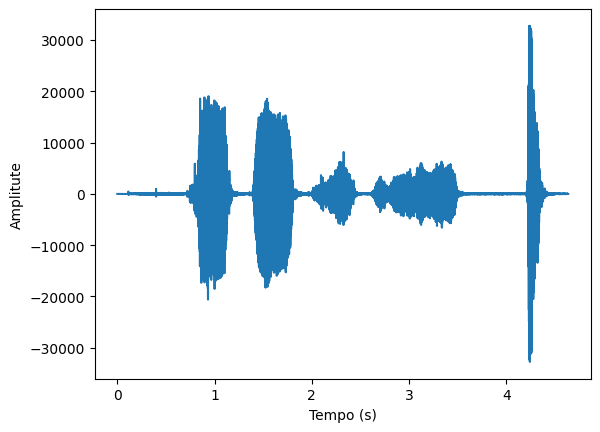

In [3]:
# encontrar o comprimento (total de amostras)
n = len(data)

# Frequencia de amostragem por sinal (quantas amostras por segundo)
fs = 48000 #48khz (audio) ou 44100 44.1khz (padrao spotify apple music) 
# https://emastered.com/pt/blog/sample-rate-for-audio#:~:text=A%20melhor%20taxa%20de%20amostragem,da%20sua%20onda%20sonora%20original.


T = 1/fs # tempo entre uma amostra e outra (inverso entre uma amostra e outra)

t = np.arange(0,n/fs,T) # (vetor de tempo) começa em 0seg, vai até o valor final do comprimento / frequencia de amostragem, e vai andando de T em T (valor calculado na variavel T)

plt.plot(t, data)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitute')

Transformada de Fourier

111307

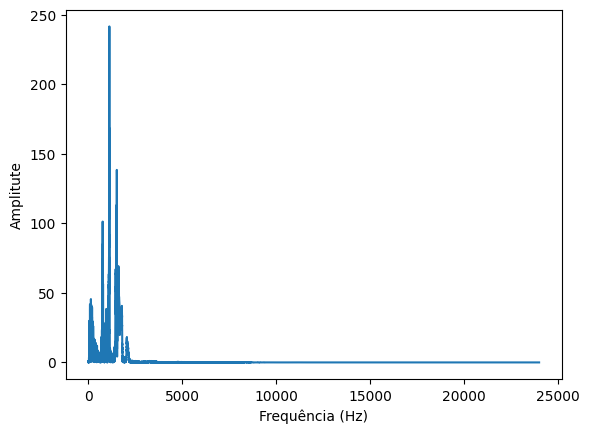

In [4]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# saindo de segundos e indo para hz
f = fftfreq(n,T)

# numero complexo (transformada)
transf = fft(data)

# módulo - para tirar os números complexos (módulo)
transf = np.abs(transf)

plt.plot(f[f > 0],transf[f > 0]*1/n) # mascara para pegar apenas os sinais com frequencias maiores que zeros e normalização o eixo vertical (dividir a transformada pelo tamanho do sinal)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitute')


# plt.ylim([0, 50])
# plt.xlim([0, 30])
len(transf[f > 0]*1/n)


In [25]:
# import pandas as pd

# df_transf = pd.DataFrame(transf[f > 0]*1/n)
# df_transf.columns = ['Amplitude']
# df_valores = pd.DataFrame()

# cont = 0
# hashtags = []
# f_hashtag = ''

# for i in range(0, int(df_transf['Amplitude'].max()) + 100, 10) :
#    cont = 0
#    for j in df_transf['Amplitude']:
#       if j > i :  
#          cont+=1
#    # print(f'Número de valores de Amplitude maiores que {i} e menores que {i+100}: {cont}')
#    if (cont > 0):
#       hashtag = f"{i}{i+100}{cont}"
#       hashtags.append(hashtag)
   
# f_hashtag = ' '.join(hashtags)

# print(f'Hashtag para essa música: {f_hashtag}')


In [26]:
# chunksize = 1024 # tamanho que o array será dividido (cada chunk tem esse tamanho) 1024 elementos
# chunks = int(len(transf) / chunksize)
# result = []

# for j in range(chunks):
#     arraychunk = np.zeros(chunksize) # criação de novo array preenchido com zero
#     for i in range(chunksize):
#         arraychunk[i] = transf[(j * chunksize) + i] # mapeando a porção do array transf correspondente ao pedaço j no arraychunk
#     result.append(arraychunk)
# print(result[0][0])

In [27]:
# ranges = np.arange(40, 301, 10)  # Intervalos de 10 em 10 Hz
# fuzfactor = 1  # Fator de ajuste menor para mais precisão

# # Inicialização dos highscores e points para os intervalos de interesse
# highscores = [0] * len(ranges)
# points = [0] * len(ranges)

# # Processamento da transformada completa
# for freq in range(40, 301):
#     if transf[freq] > 0:
#         mag = np.log(np.abs(transf[freq]) + 1)
#         i = 0
#         while i < len(ranges) and ranges[i] < freq:
#             i += 1
#         if i < len(ranges) and mag > highscores[i]:
#             highscores[i] = mag
#             points[i] = freq

# # Cálculo da hashtag única com mais detalhes
# h = 0
# for i in range(len(points)):
#     h += (points[i] - (points[i] % fuzfactor)) * (10 ** (len(points) - i - 1))

# print(f"Hashtag: {h}")

# # Extraindo os pontos individuais para leitura
# h_copy = h
# extracted_points = []

# for i in range(len(points)):
#     factor = 10 ** (len(points) - i - 1)
#     point = (h_copy // factor) * fuzfactor
#     extracted_points.append(point)
#     h_copy %= factor

# print(f"Frequencias: {extracted_points}")


STFT

435


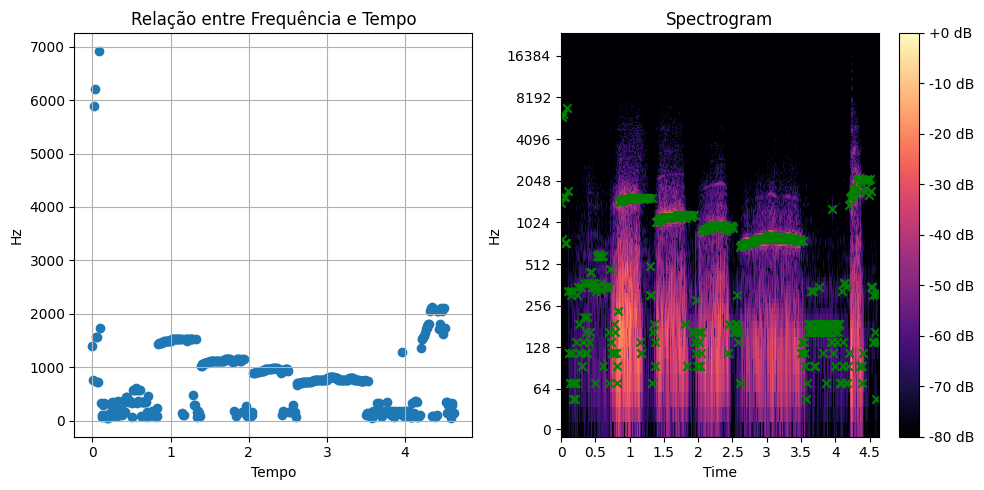

In [44]:
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display as dp
import matplotlib.pyplot as plt
import hashlib
import pandas as pd

df_hashes = []

# https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/

def stft(w):
    y, sr = librosa.load(w, sr=None, mono=True)
    Audio(y, rate= sr)

    S = librosa.stft(y, n_fft=2048, hop_length=512, win_length=1024)
    S = np.abs(S)

    plot(S, sr)

def plot(x, y):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

    img = dp.specshow(librosa.amplitude_to_db(x, ref=np.max), y_axis='log', x_axis='time', sr=y)
    fig.colorbar(img, ax=ax2, format='%+2.0f dB')
    ax2.set_title('Spectrogram')

    # Encontrar os índices dos valores máximos
    max_indices = np.argwhere(x == np.max(x, axis=0))

    # Obter os tempos e as frequências correspondentes
    times = librosa.frames_to_time(max_indices[:, 1], sr=y)
    frequencies = librosa.fft_frequencies(sr=y)[max_indices[:, 0]]

    ax2.scatter(times, frequencies, marker='x', color='green', label='Max Values')

    df_hashes.append(pd.DataFrame({'Frequencia': frequencies, 'Tempo': times}))

    df_concat = pd.concat(df_hashes, ignore_index=True)
    print(len(df_concat))

    ax1.scatter(df_concat['Tempo'], df_concat['Frequencia'], marker='o')
    ax1.set_title('Relação entre Frequência e Tempo')
    ax1.set_ylabel('Hz')
    ax1.set_xlabel('Tempo')
    ax1.grid(True)

    plt.tight_layout()
    plt.show()

stft('assovio.wav')

844


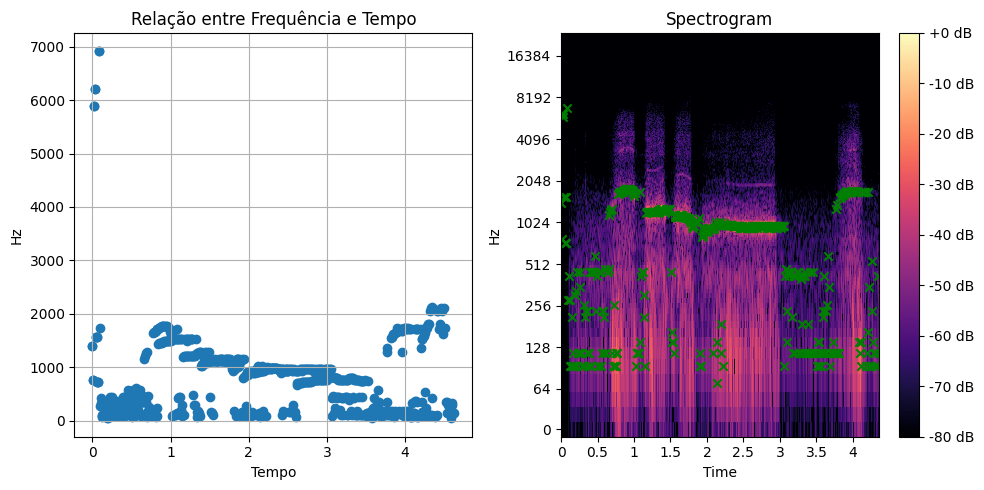

In [45]:
stft('joao_assovio.wav')

In [ ]:
  # Poucas linguagens, como o Python e o Ruby, vêm com um suporte de hashing integrado.
   # Declaração
    my_hash_table = {}
    my_hash_table = dict()

   # Inserção
    my_hash_table[key] = value

   # Busca
    value = my_hash_table.get(key) # retorna None se a chave não estiver presente || Diferido em python 3, disponível em python 2
    value = my_hash_table[key] # lança uma exceção ValueError se a chave não estiver presente

    # Exclusão
    del my_hash_table[key] # lança uma exceção ValueError se a chave não estiver presente

    # Obtendo todas as chaves e valores armazenados no dicionário
    keys = my_hash_table.keys()
    values = my_hash_table.values()

In [96]:
blocks_of_10 = []
my_hash_table = []
my_hash_table = dict()

for df in df_hashes:
    num_rows = len(df)
    for i in range(0, num_rows, 10):
        block = df.iloc[i:i+10]  # Selecionar um bloco de 10 registros
        blocks_of_10.append(block.values.tolist()) 

        # my_hash_table[i] = hash(blocks_of_10)

for index, block in enumerate(blocks_of_10):
    print(f"Block {index + 1}:")
    for row in block:
        max = np.max(row[1])
        min = np.min(row[1])
        print(row)
        my_hash_table[index] = [hash(row[0]), max]
    print()


print(f'Total blocks: {len(blocks_of_10)}')

Block 1:
[46.875, 0.18133333333333335]
[46.875, 0.20266666666666666]
[46.875, 3.5733333333333333]
[46.875, 4.586666666666667]
[70.3125, 0.128]
[70.3125, 0.17066666666666666]
[70.3125, 0.192]
[70.3125, 0.21333333333333335]
[70.3125, 0.5013333333333333]
[70.3125, 0.6933333333333334]

Block 2:
[70.3125, 0.8106666666666666]
[70.3125, 1.3333333333333333]
[70.3125, 2.6026666666666665]
[70.3125, 3.584]
[70.3125, 3.8613333333333335]
[70.3125, 4.064]
[70.3125, 4.074666666666666]
[70.3125, 4.085333333333334]
[70.3125, 4.16]
[70.3125, 4.1706666666666665]

Block 3:
[70.3125, 4.384]
[93.75, 0.2986666666666667]
[93.75, 0.30933333333333335]
[93.75, 0.6186666666666667]
[93.75, 0.8213333333333334]
[93.75, 1.376]
[93.75, 1.8346666666666667]
[93.75, 1.984]
[93.75, 2.005333333333333]
[93.75, 2.026666666666667]

Block 4:
[93.75, 3.552]
[93.75, 3.6906666666666665]
[93.75, 3.7013333333333334]
[93.75, 3.989333333333333]
[93.75, 4.1066666666666665]
[93.75, 4.181333333333333]
[93.75, 4.352]
[93.75, 4.3626666666

In [116]:
# Lista para armazenar os blocos de registros a cada 30 segundos
blocks_per_30_seconds = []

# Iterar por cada DataFrame na lista
for df in df_hashes:
    # Ordenar o DataFrame pela coluna 'Tempo' para garantir a ordem cronológica
    df_sorted = df.sort_values(by='Tempo')
    
    # Obter o tempo total da música (assumindo que o maior valor em 'Tempo' é o tempo total)
    total_time = df_sorted['Tempo'].max()
    
    print(int(total_time/0.5))

    # Iterar através dos intervalos de 30 segundos
    for start_time in range(0, int(total_time), 30):
        # Selecionar os registros dentro do intervalo atual de 30 segundos
        block = df_sorted[(df_sorted['Tempo'] >= start_time) & (df_sorted['Tempo'] < start_time + 30)]
        if not block.empty:
            blocks_per_30_seconds.append(block.values.tolist())

# Imprimir os blocos de registros a cada 30 segundos
for index, block in enumerate(blocks_per_30_seconds):
    print(f"Block {index + 1}:")
    for row in block:
        print(row)
    print()

# Mostrar o total de blocos
total_blocks = len(blocks_per_30_seconds)
print(f"Total number of blocks: {total_blocks}")

9
8
Block 1:
[1406.25, 0.0]
[773.4375, 0.010666666666666666]
[5882.8125, 0.021333333333333333]
[6210.9375, 0.032]
[1570.3125, 0.042666666666666665]
[726.5625, 0.05333333333333334]
[1570.3125, 0.064]
[726.5625, 0.07466666666666667]
[6914.0625, 0.08533333333333333]
[1734.375, 0.096]
[328.125, 0.10666666666666667]
[117.1875, 0.11733333333333333]
[70.3125, 0.128]
[304.6875, 0.13866666666666666]
[328.125, 0.14933333333333335]
[117.1875, 0.16]
[70.3125, 0.17066666666666666]
[46.875, 0.18133333333333335]
[70.3125, 0.192]
[46.875, 0.20266666666666666]
[70.3125, 0.21333333333333335]
[140.625, 0.224]
[304.6875, 0.23466666666666666]
[351.5625, 0.24533333333333332]
[187.5, 0.256]
[117.1875, 0.26666666666666666]
[117.1875, 0.2773333333333333]
[351.5625, 0.288]
[93.75, 0.2986666666666667]
[93.75, 0.30933333333333335]
[140.625, 0.32]
[375.0, 0.33066666666666666]
[210.9375, 0.3413333333333333]
[117.1875, 0.352]
[164.0625, 0.3626666666666667]
[210.9375, 0.37333333333333335]
[117.1875, 0.384]
[375.0, 0.